In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [3]:
!pip3 install pandas

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.5 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.5 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.2/11.5 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.3/11.5 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.3/11.5 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/11.5 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.5 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.5/11.5 MB 1.2 MB/s eta 0:00:10
   - ---------------

In [12]:
import os
import pandas as pd
import urllib.request
import tarfile
from pathlib import Path

def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    data_path = Path('datasets/housing/housing.csv')
    
    if not data_path.is_file():
        if not tarball_path.is_file():
            Path('datasets').mkdir(parents=True, exist_ok=True)
            url = 'https://github.com/ageron/data/raw/main/housing.tgz'
            print("Downloading housing dataset...")
            urllib.request.urlretrieve(url, tarball_path)
            print("Download complete.")
        
        print("Extracting housing dataset...")
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')
        print("Extraction complete.")
    
    print("Loading housing dataset into a DataFrame...")
    return pd.read_csv(data_path)

# Usage
housing = load_housing_data()


Loading housing dataset into a DataFrame...


In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

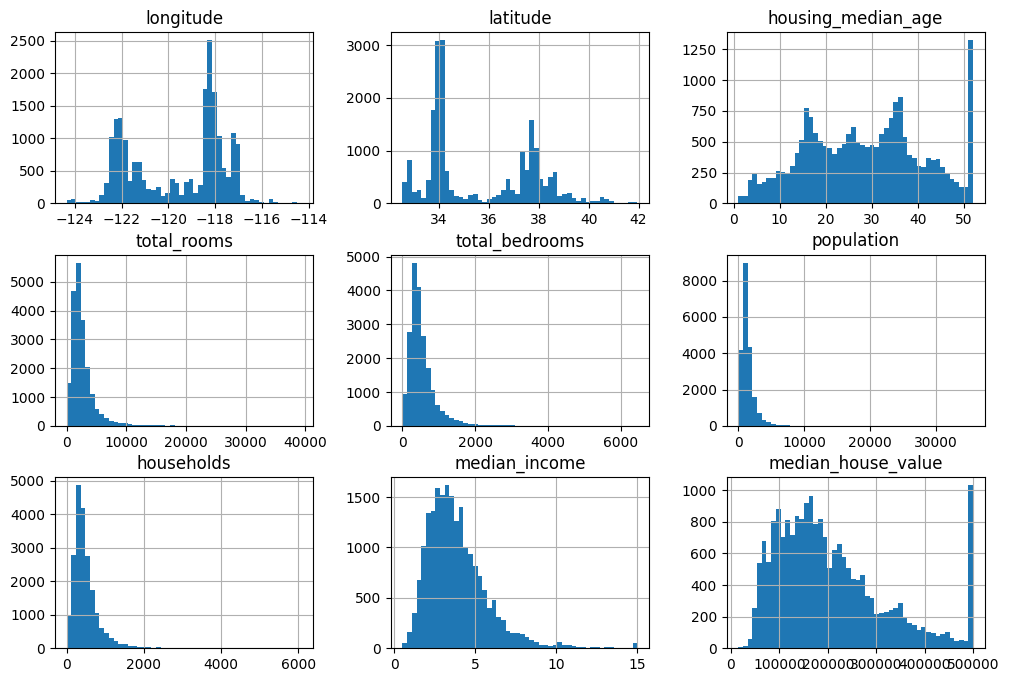

In [22]:
housing.hist(bins=50, figsize=(12,8))

In [26]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

<Axes: xlabel='income_cat'>

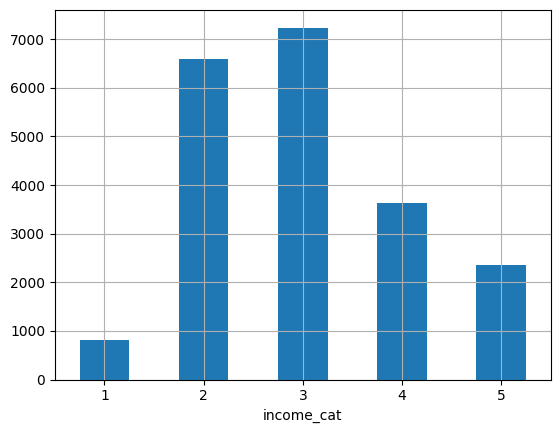

In [28]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)

In [30]:
!pip3 install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.9 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.9 MB 2.7 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.9 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.9 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.9 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.9 MB 3.1 MB/s eta 0:00:04
   ---- -------------------

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [32]:
strat_train_set, strat_test_set = strat_splits[0]

In [33]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

C:\Users\arjun\AppData\Local\Temp\ipykernel_20000\4166485955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\arjun\AppData\Local\Temp\ipykernel_20000\4166485955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [35]:
housing =strat_test_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

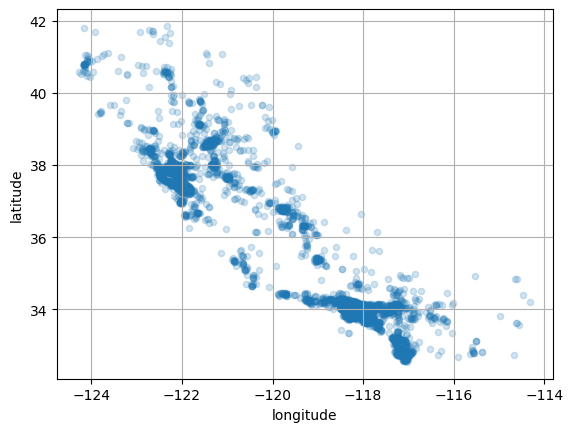

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

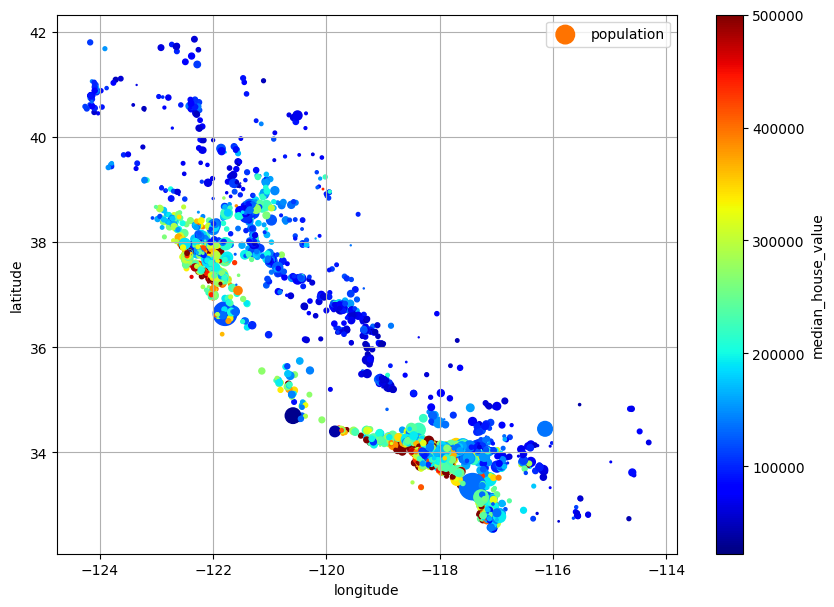

In [38]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,s=housing['population']/100, label='population', c='median_house_value', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10,7))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

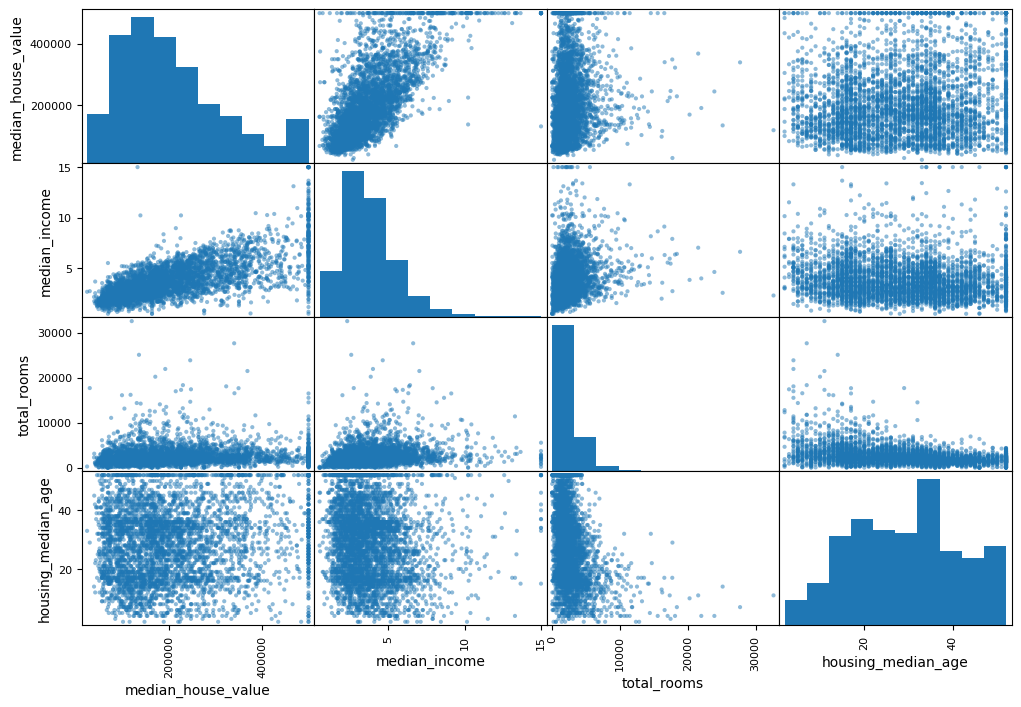

In [41]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8))

In [42]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house'] = housing['population']/housing['households']

In [43]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()


In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [46]:
housing_num = housing.select_dtypes(include=[np.number])

In [47]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [48]:
X = imputer.transform(housing_num)

In [49]:
type(X)

numpy.ndarray

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [51]:
housing_cat = housing[['ocean_proximity']]

In [52]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [53]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [54]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [55]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


In [ ]:
# Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axix=0)

        #so yeah, something like this we have to define the fit, tansform functions.  

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('impute',SimpleImputer(strategy='median')),('standardize',StandardScaler())])

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = cross_val_score(foreset_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)


In [ ]:
# HyperParameter Tuning

from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('Preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42)),

])

param_grid = [
    {'preprocessing_geo__n_clusters':[5,8,10],
     'random_forest__max_features':[4,6,8]},
     {'preprocessing__geo_n_clusters':[10,15],
      'random_forest__max_features': [6,8,10]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_lables)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

params_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                   'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=params_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)
